In [4]:
"""
    感知机和神经网络
    ~~~~~~~~~~

    感知机模型

    :copyright: (c) 2016 by the huaxz1986.
    :license: lgpl-3.0, see LICENSE for more details.
"""

from matplotlib import  pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def creat_data(n):
    '''
    创建线性可分数据集

    :param n: 正例样本的个数（同时也是负例样本的个数）
    :return: 返回一个线性可分数据集，数据集大小为 2*n
    '''
    np.random.seed(1)
    x_11=np.random.randint(0,100,(n,1)) # 第一组：第一维坐标值
    x_12=np.random.randint(0,100,(n,1,))# 第一组：第二维坐标值
    x_13=20+np.random.randint(0,10,(n,1,))#第一组： 第三维坐标值
    x_21=np.random.randint(0,100,(n,1)) # 第二组：第一维坐标值
    x_22=np.random.randint(0,100,(n,1)) # 第二组：第二维坐标值
    x_23=10-np.random.randint(0,10,(n,1,)) # 第二组：第三维坐标值

    new_x_12=x_12*np.sqrt(2)/2-x_13*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_13=x_12*np.sqrt(2)/2+x_13*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_22=x_22*np.sqrt(2)/2-x_23*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_23=x_22*np.sqrt(2)/2+x_23*np.sqrt(2)/2## 沿第一维轴旋转45度

    plus_samples=np.hstack([x_11,new_x_12,new_x_13,np.ones((n,1))]) # 拼接成正例数据集
    minus_samples=np.hstack([x_21,new_x_22,new_x_23,-np.ones((n,1))]) # 拼接成负例数据集
    samples=np.vstack([plus_samples,minus_samples]) # 拼接成完整数据集
    np.random.shuffle(samples)  # 混洗数据
    return samples
def creat_data_no_linear(n):
    '''
    创建线性不可分数据集

    :param n: 正例样本的个数（同时也是负例样本的个数）
    :return: 返回一个线性不可分数据集，数据集大小为 2*n
    '''
    np.random.seed(1)
    x_11=np.random.randint(0,100,(n,1))# 第一组：第一维坐标值
    x_12=np.random.randint(0,100,(n,1,))# 第一组：第二维坐标值
    x_13=10+np.random.randint(0,10,(n,1,))#第一组： 第三维坐标值
    x_21=np.random.randint(0,100,(n,1))# 第二组：第一维坐标值
    x_22=np.random.randint(0,100,(n,1))# 第二组：第二维坐标值
    x_23=20-np.random.randint(0,10,(n,1,)) # 第二组：第三维坐标值

    new_x_12=x_12*np.sqrt(2)/2-x_13*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_13=x_12*np.sqrt(2)/2+x_13*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_22=x_22*np.sqrt(2)/2-x_23*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_23=x_22*np.sqrt(2)/2+x_23*np.sqrt(2)/2## 沿第一维轴旋转45度

    plus_samples=np.hstack([x_11,new_x_12,new_x_13,np.ones((n,1))])# 拼接成正例数据集
    minus_samples=np.hstack([x_21,new_x_22,new_x_23,-np.ones((n,1))])# 拼接成负例数据集
    samples=np.vstack([plus_samples,minus_samples])# 拼接成完整数据集
    np.random.shuffle(samples)  # 混洗数据
    return samples
def plot_samples(ax,samples):
    '''
    绘制样本点

    :param ax: 绘制图形所在的 Axes
    :param samples: 样本数据集
    :return: None
    '''
    Y=samples[:,-1] # 标记信息
    position_p=Y==1 ## 正类位置
    position_m=Y==-1 ## 负类位置
    ax.scatter(samples[position_p,0],samples[position_p,1],
        samples[position_p,2],marker='+',label='+',color='b') # 绘制正类样本点
    ax.scatter(samples[position_m,0],samples[position_m,1],
        samples[position_m,2],marker='^',label='-',color='y') # 绘制负类样本点

def run_plot_samples():
    '''
    绘制线性可分数据集

    :return: None
    '''
    fig=plt.figure()
    ax=Axes3D(fig)
    data=creat_data(100) # 产生线性可分数据集
    plot_samples(ax,data)
    ax.legend(loc='best')
    plt.show()

def run_plot_samples_no_linear():
    '''
    绘制线性不可分数据集

    :return: None
    '''
    data=creat_data_no_linear(100)# 产生线性不可分数据集
    fig=plt.figure()
    ax=Axes3D(fig)
    plot_samples(ax,data)
    ax.legend(loc='best')
    plt.show()
def perceptron(train_data,eta,w_0,b_0):
     '''
    感知机的原始算法

    :param train_data: 训练数据集
    :param eta: 学习率
    :param w_0: 初始权重向量
    :param b_0: 初始的 b
    :return: 一个元组，依次为：最终的权重向量，最终的 b 值，迭代次数
     '''
     x=train_data[:,:-1]  # x 数据
     y=train_data[:,-1]  #  对应的标记
     length= train_data.shape[0] #样本集大小
     w=w_0
     b=b_0
     step_num=0
     while True:
        i=0
        while(i< length): ## 遍历一轮样本集中的所有的样本点
            step_num+=1
            '''
          当应用于线性不可分数据集时，用下面4行代替上面的 step_num+=1 这一行。如果不这么做，那么当用于线性
          不可分数据集时，迭代永远不会停止。
            step_num+=1
            if step_num>=10000000:
                print("failed!,step_num =%d"%step_num)
                return
          '''
            x_i=x[i].reshape((x.shape[1],1)) # 变成列向量，因为需要执行 np.dot 函数
            y_i=y[i]
            if y_i*(np.dot(np.transpose(w),x_i)+b) <=0: # 该点是误分类点
                w=w+eta*y_i*x_i  # 梯度下降
                b=b+eta*y_i      # 梯度下降
                break # 执行下一轮筛选
            else:#该点不是误分类点，选取下一个样本点
                i=i+1
        if(i== length): #没有误分类点，结束循环
            break
     return (w,b,step_num)
def creat_hyperplane(x,y,w,b):
    '''
    创建分离超平面

    :param x: 分离超平面上的点的x坐标组成的数组
    :param y: 分离超平面上的点的y坐标组成的数组
    :param w: 超平面的法向量，它是一个列向量
    :param b: 超平面的截距
    :return: 分离超平面上的点的z坐标组成的数组
    '''
    return (-w[0][0]*x-w[1][0]*y-b)/w[2][0] # w0*x+w1*y+w2*z+b=0
def run_perceptron():
    '''
    对线性可分数据集执行感知机的原始算法并绘制分离超平面

    :return: None
    '''
    data=creat_data(100) #产生线性可分数据集
    eta,w_0,b_0=0.1,np.ones((3,1),dtype=float),1 # 初始化 学习率、权重、 b
    w,b,num=perceptron(data,eta,w_0,b_0) # 执行感知机的原始形式
    ### 绘图
    fig=plt.figure()
    plt.suptitle("perceptron")
    ax=Axes3D(fig)

    ### 绘制样本点
    plot_samples(ax,data)

    ##  绘制分离超平面
    x=np.linspace(-30,100,100)  # 分离超平面的 x坐标数组
    y=np.linspace(-30,100,100) # 分离超平面的 y坐标数组
    x,y=np.meshgrid(x,y) # 划分网格
    z=creat_hyperplane(x,y,w,b)  # 分离超平面的 z坐标数组
    ax.plot_surface(x, y, z, rstride=1, cstride=1,color='g',alpha=0.2)

    ax.legend(loc="best")
    plt.show()
def run_perceptron_no_linear():
    '''
    对线性不可分数据集执行感知机的元素算法

    :return: None
    '''
    data=creat_data_no_linear(100)#产生线性不可分数据集
    perceptron(data,eta=0.1,w_0=np.zeros((2,1)),b_0=0)

def creat_w(train_data,alpha):
    '''
    根据训练数据集和 alpha向量 创建 权重向量

    :param train_data: 训练数据集
    :param alpha: alpha 向量
    :return: 权重向量
    '''
    x=train_data[:,:-1]  # x 数据
    y=train_data[:,-1]  #  对应的分类
    N= train_data.shape[0] #样本集大小
    w=np.zeros((x.shape[1],1))
    for i in range(0,N):
        w=w+alpha[i][0]*y[i]*(x[i].reshape(x[i].size,1))
    return w
def perceptron_dual(train_data,eta,alpha_0,b_0):
    '''
    感知机的对偶形式算法

    :param train_data: 训练数据集
    :param eta: 学习率
    :param alpha_0: 初始的 alpha 向量
    :param b_0: 初始的 b 值
    :return: 一个元组，依次为：最终的alpha 向量、最终的 b 值、迭代次数
    '''
    x=train_data[:,:-1]  # x 数据
    y=train_data[:,-1]  #  对应的分类
    length= train_data.shape[0] #样本集大小
    alpha=alpha_0
    b=b_0
    step_num=0
    while True:
        i=0
        while(i< length):
            step_num+=1
            x_i=x[i].reshape((x.shape[1],1)) # 变形为列向量，因为需要调用 np.dot
            y_i=y[i]
            w=creat_w(train_data,alpha)
            z=y_i*(np.dot(np.transpose(w),x_i)+b)
            if z <=0: # 该点是误分类点
                alpha[i][0]+=eta  # 梯度下降
                b+=eta*y_i  # 梯度下降
                break # 梯度下降了，从头开始，执行下一轮筛选
            else:
                i=i+1 #该点不是误分类点，选取下一个样本点
        if(i== length ): #没有误分类点，结束循环
            break
    return (alpha,b,step_num)
def run_perceptron_dual():
    '''
    对线性可分数据集执行感知机的原始算法和对偶形式算法，并绘制分离超平面

    :return: None
    '''
    data=creat_data(100)
    eta,w_0,b_0=0.1,np.ones((3,1),dtype=float),1
    w_1,b_1,num_1=perceptron(data,eta,w_0,b_0) ##执行原始形式的算法
    alpha,b_2,num_2=perceptron_dual(data,eta=0.1,alpha_0=np.zeros((data.shape[0]*2,1)),
        b_0=0) # 执行对偶形式的算法
    w_2=creat_w(data,alpha)

    print("w_1,b_1",w_1,b_1)
    print("w_2,b_2",w_2,b_2)

    ## 绘图
    fig=plt.figure()
    plt.suptitle("perceptron")
    ax=Axes3D(fig)

    ### 绘制样本点
    plot_samples(ax,data)

    ##  绘制分离超平面
    x=np.linspace(-30,100,100)  # 分离超平面的 x坐标数组
    y=np.linspace(-30,100,100) # 分离超平面的 y坐标数组
    x,y=np.meshgrid(x,y) # 划分网格
    z=creat_hyperplane(x,y,w_1,b_1)  # 原始形式算法的分离超平面的 z坐标数组
    z_2=creat_hyperplane(x,y,w_2,b_2)  # 对偶形式算法的分离超平面的 z坐标数组
    ax.plot_surface(x, y, z, rstride=1, cstride=1,color='g',alpha=0.2)
    ax.plot_surface(x, y, z_2, rstride=1, cstride=1,color='c',alpha=0.2)
    ax.legend(loc="best")
    plt.show()
def test_eta(data,ax,etas,w_0,alpha_0,b_0):
        '''
        测试学习率对于感知机两种形式算法的收敛速度的影响

        :param data:  训练数据集
        :param ax: Axes实例，负责绘制图形
        :param etas: 候选的学习率的值组成的列表
        :param w_0: 原始算法用到的初始权重向量
        :param alpha_0: 对偶形式用到的初始 alpha 向量
        :param b_0: 初始 b 值
        :return: None
        '''
        nums1=[]
        nums2=[]
        for eta in etas:
            _,_,num_1=perceptron(data,eta,w_0=w_0,b_0=b_0) # 获取原始形式算法的迭代次数
            _,_,num_2=perceptron_dual(data,eta=0.1,alpha_0=alpha_0,b_0=b_0) # 获取对偶形式算法的迭代次数
            nums1.append(num_1)
            nums2.append(num_2)
        ax.plot(etas,np.array(nums1),label='orignal iteraton times')
        ax.plot(etas,np.array(nums2),label='dual iteraton times')
def run_test_eta():
    '''
    执行 test_eta

    :return: None
    '''
    fig=plt.figure()
    fig.suptitle("perceptron")
    ax=fig.add_subplot(1,1,1)
    ax.set_xlabel(r'$\eta$')

    data=creat_data(20) # 创建线性可分数据集
    etas=np.linspace(0.01,1,num=25,endpoint=False)
    w_0,b_0,alpha_0=np.ones((3,1)),0,np.zeros((data.shape[0],1))
    test_eta(data,ax,etas,w_0,alpha_0,b_0)

    ax.legend(loc="best",framealpha=0.5)
    plt.show()




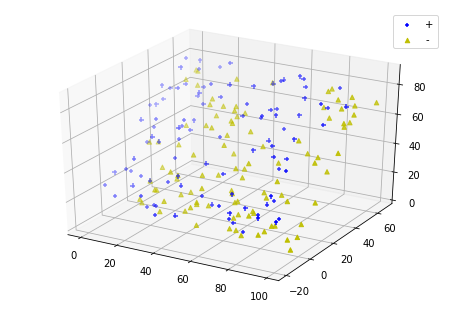

In [5]:
if __name__=='__main__':
    run_plot_samples() # 执行 run_plot_samples
    #run_perceptron()# 执行 run_perceptron
    #run_perceptron_dual()# 执行 run_perceptron_dual
    #run_test_eta()# 执行 run_test_eta
    #run_plot_samples_no_linear()# 执行 run_plot_samples_no_linear
    #run_perceptron_no_linear()# 执行 run_perceptron_no_linear